In [ ]:
!pip install kaggle
!pip install seaborn
!pip install scikit-learn
!pip install imbalanced-learn


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
## 1 - Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, RobustScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score 
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import precision_recall_curve ,confusion_matrix,make_scorer,accuracy_score, precision_score, recall_score, f1_score,  classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
##2 -Load the dataset

pd.set_option('display.max_columns',None)
data= pd.read_csv('spambase_csv.csv')

In [4]:
##3 - Check dataset overview and balance
print("Spam Email Dataset Overview:")
print("Number of examples (emails):", data.shape[0])
print("Number of features (attributes):", data.shape[1] - 1) 
print("\nFirst few rows of the dataset:")
data.head()

Spam Email Dataset Overview:
Number of examples (emails): 4601
Number of features (attributes): 57

First few rows of the dataset:


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
4# # Step 4: Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())



Checking for missing values:
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_

In [6]:
#5: Check the balance of the dataset
class_distribution = data['class'].value_counts()
class_distribution_normalized = data['class'].value_counts(normalize=True)

print("\nClass Distribution in the Dataset:")
print(f"Number of Non-Spam Emails: {class_distribution[0]} ({class_distribution_normalized[0]:.2%})")
print(f"Number of Spam Emails: {class_distribution[1]} ({class_distribution_normalized[1]:.2%})")

is_balanced = (class_distribution_normalized[1] >= 0.4) and (class_distribution_normalized[0] >= 0.4)  # Adjust threshold as needed
balance_status = "Balanced" if is_balanced else "Imbalanced"
print(f"\nDataset Balance Status: {balance_status}") 
#need to handle imbalance later maybe SMOTE have to check evaluation matrix first


Class Distribution in the Dataset:
Number of Non-Spam Emails: 2788 (60.60%)
Number of Spam Emails: 1813 (39.40%)

Dataset Balance Status: Imbalanced


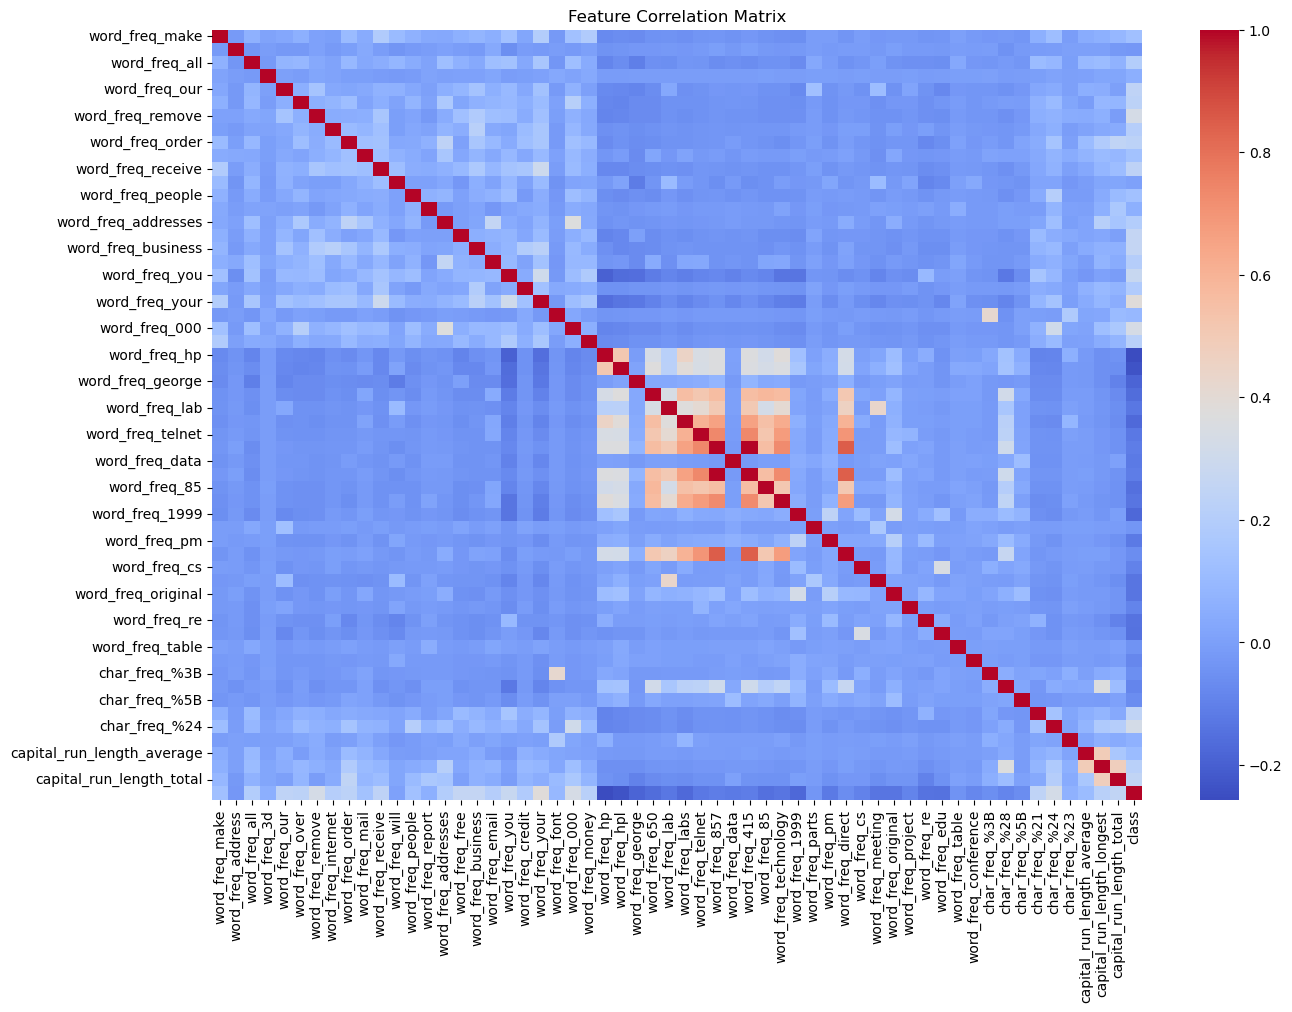


Correlation of features with the target (class 'class'):
class                         1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_%24                 0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_%21                 0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capita

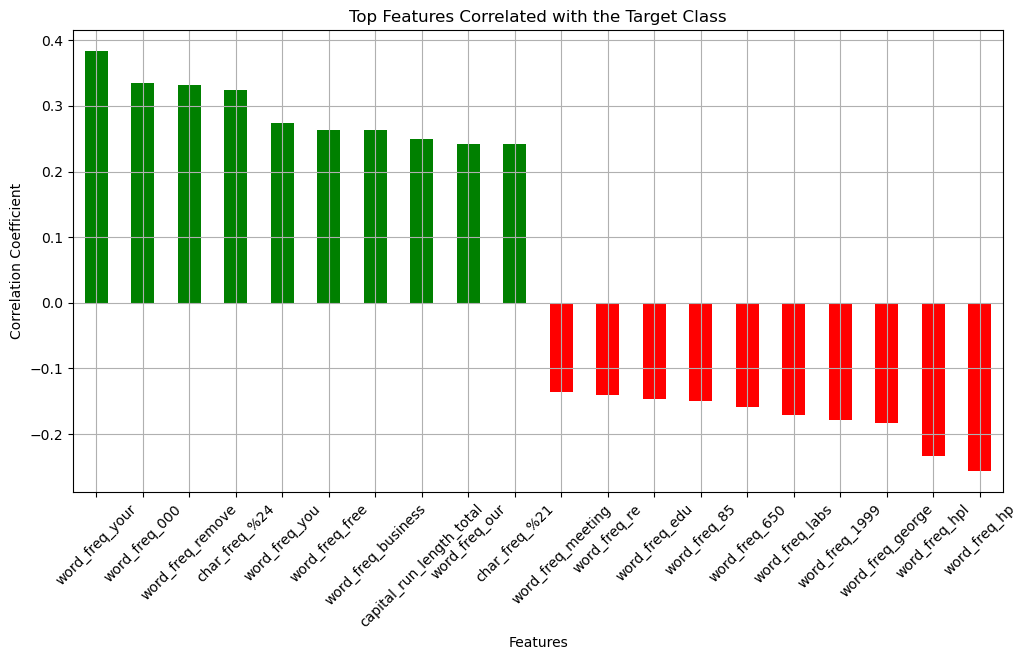

In [7]:
#6: Display correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Display correlation of features with the class 'class'
correlation_with_target = correlation_matrix['class'].sort_values(ascending=False)
print("\nCorrelation of features with the target (class 'class'):")
print(correlation_with_target)

# Select top 10 positively and negatively correlated features with 'class'
top_positive_corr = correlation_with_target.head(11)[1:]  # Excluding class
top_negative_corr = correlation_with_target.tail(10)

top_features = pd.concat([top_positive_corr, top_negative_corr])

# Plot the correlations
plt.figure(figsize=(12, 6))
top_features.plot(kind='bar', color=['green' if val > 0 else 'red' for val in top_features])
plt.title('Top Features Correlated with the Target Class')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#plotting the correlation between features and class , will help selecting the right ffeatures to tune our model

In [8]:
# 7: Split data into training and test sets (70% train, 30% test)

X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("\nData Splits:")
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Data Splits:
Training set size: (3220, 57)
Test set size: (1381, 57)


In [9]:
#  Train the Naive Bayes model : 
# we will use multinomial
spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)
#prediction of the test set
y_pred = spam_detector.predict(X_test)
y_prob = spam_detector.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class


In [10]:
##Common Functions 
def evaluate_model(y_test, y_pred, y_prob, title="Spam Detector Evaluation Metrics"):
    """
    Evaluate the model's performance using various metrics.
    
    Parameters:
    - y_test: Ground truth labels.
    - y_pred: Predicted labels from the model.
    - y_prob: Predicted probabilities from the model.
    - title: Title for the printed metrics.
    
    Returns:
    - A dictionary of evaluation metrics.
    """
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    
    print(f"\n{title}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc_score': auc_score
    }

def plot_confusion_matrix(y_test, y_pred, labels, title="Confusion Matrix"):
    """
    Plot the confusion matrix as a heatmap.
    
    Parameters:
    - y_test: Ground truth labels.
    - y_pred: Predicted labels from the model.
    - labels: List of labels for the confusion matrix axes (e.g., ['Non-Spam', 'Spam']).
    - title: Title for the confusion matrix plot.
    """
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def print_classification_report(y_test, y_pred, title="Classification Report"):
    """
    Print the classification report.
    
    Parameters:
    - y_test: Ground truth labels.
    - y_pred: Predicted labels from the model.
    - title: Title for the classification report.
    """
    print(f"\n{title}")
    print(classification_report(y_test, y_pred))

def plot_roc_curve(y_test, y_prob, auc_score, title="ROC Curve"):
    """
    Plot the ROC curve.
    
    Parameters:
    - y_test: Ground truth labels.
    - y_prob: Predicted probabilities from the model.
    - auc_score: Pre-calculated AUC score.
    - title: Title for the ROC curve plot.
    """
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


Spam Detector Evaluation Metrics
Accuracy: 0.7820
Precision: 0.7624
Recall: 0.6950
F1 Score: 0.7271
AUC Score: 0.8553


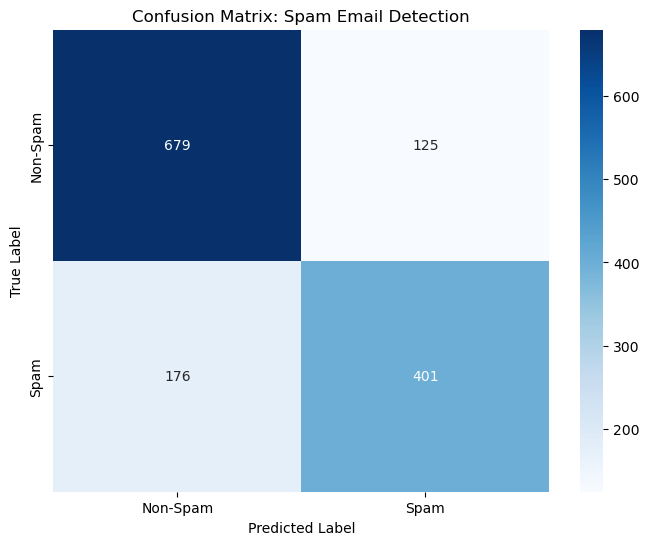


Detailed Classification Report
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       804
           1       0.76      0.69      0.73       577

    accuracy                           0.78      1381
   macro avg       0.78      0.77      0.77      1381
weighted avg       0.78      0.78      0.78      1381



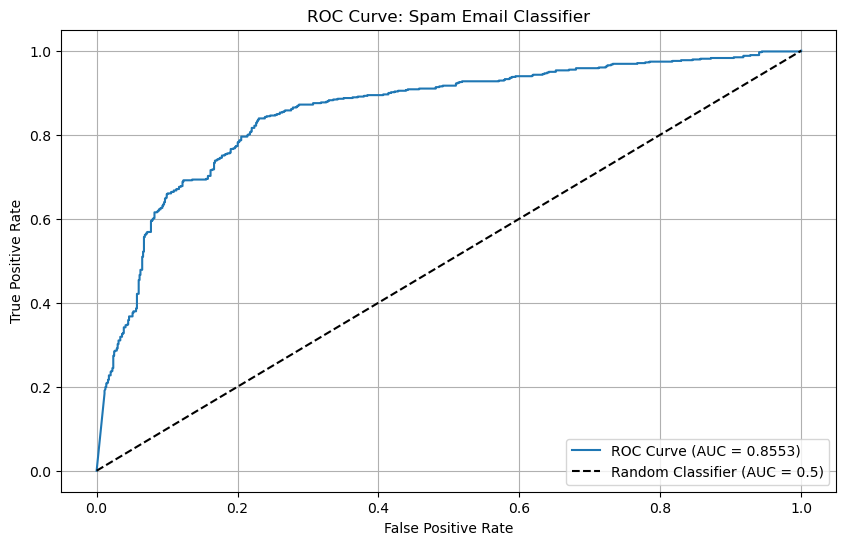

In [11]:
# Train the Naive Bayes model
spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)

# Prediction of the test set
y_pred = spam_detector.predict(X_test)
y_prob = spam_detector.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluation of the model using the refactored functions
metrics = evaluate_model(y_test, y_pred, y_prob, title="Spam Detector Evaluation Metrics")

# Visualization of the confusion matrix
plot_confusion_matrix(y_test, y_pred, labels=['Non-Spam', 'Spam'], title="Confusion Matrix: Spam Email Detection")

# Classification report
print_classification_report(y_test, y_pred, title="Detailed Classification Report")

# Plot the ROC curve
plot_roc_curve(y_test, y_prob, metrics['auc_score'], title="ROC Curve: Spam Email Classifier")


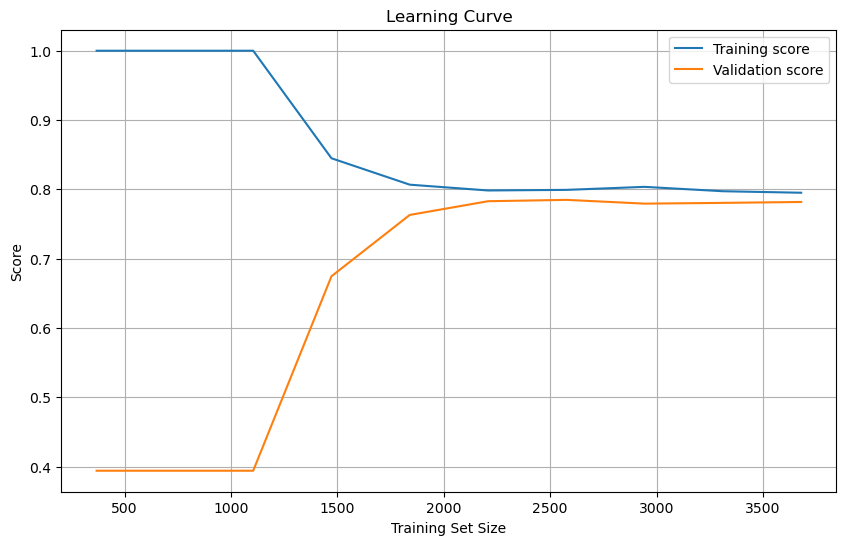

In [12]:
#Learning curve For naive bayes model
def plot_learning_curve(model, X, y, cv=5, scoring='accuracy'):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    # Calculate mean scores
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score')
    plt.plot(train_sizes, validation_scores_mean, label='Validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the learning curve for the Naive Bayes model
plot_learning_curve(spam_detector, X, y)


Class distribution after applying SMOTE:
class
1    1984
0    1984
Name: count, dtype: int64
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best Parameters found by GridSearchCV:
{'model__alpha': 0.1}

Improved Spam Detector Evaluation Metrics
Accuracy: 0.7878
Precision: 0.7582
Recall: 0.7227
F1 Score: 0.7400
AUC Score: 0.8636


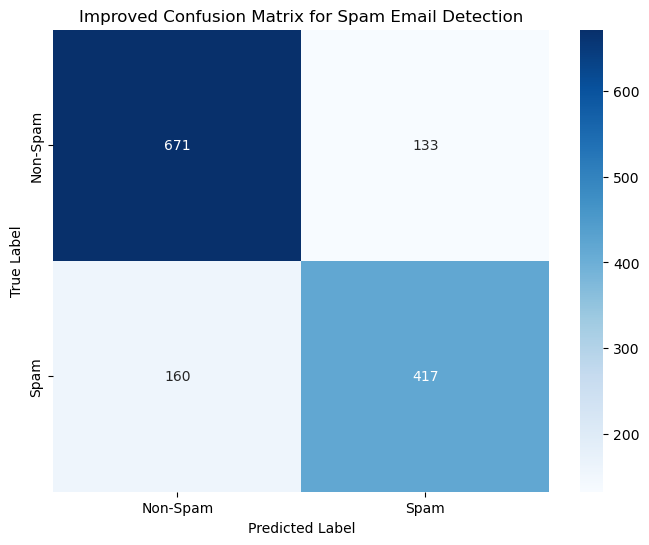


Improved Classification Report for Spam Email Detection
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       804
           1       0.76      0.72      0.74       577

    accuracy                           0.79      1381
   macro avg       0.78      0.78      0.78      1381
weighted avg       0.79      0.79      0.79      1381



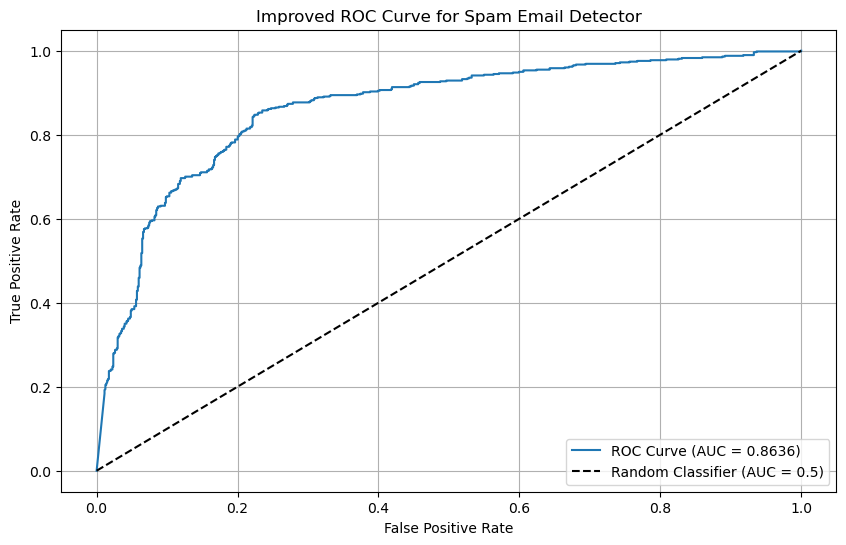

In [13]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass distribution after applying SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Pipeline: Resampling and hyperparameter tuning
pipeline = Pipeline([
    ('model', MultinomialNB())
])

# Hyperparameter grid for tuning
param_grid = {
    'model__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=make_scorer(f1_score, average='weighted'),  # Weighted F1 score for optimization
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Train the model using GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found
print("\nBest Parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Use the best model to make predictions and evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model using the refactored functions
metrics = evaluate_model(y_test, y_pred, y_prob, title="Improved Spam Detector Evaluation Metrics")

# Confusion matrix visualization
plot_confusion_matrix(y_test, y_pred, labels=['Non-Spam', 'Spam'], title="Improved Confusion Matrix for Spam Email Detection")

# Classification report
print_classification_report(y_test, y_pred, title="Improved Classification Report for Spam Email Detection")

# Plot the ROC curve
plot_roc_curve(y_test, y_prob, metrics['auc_score'], title="Improved ROC Curve for Spam Email Detector")


Best Threshold for Maximum F1 Score: 0.0143

Optimized Spam Detector Evaluation Metrics
Accuracy: 0.8038
Precision: 0.7237
Recall: 0.8579
F1 Score: 0.7851
AUC Score: 0.8636


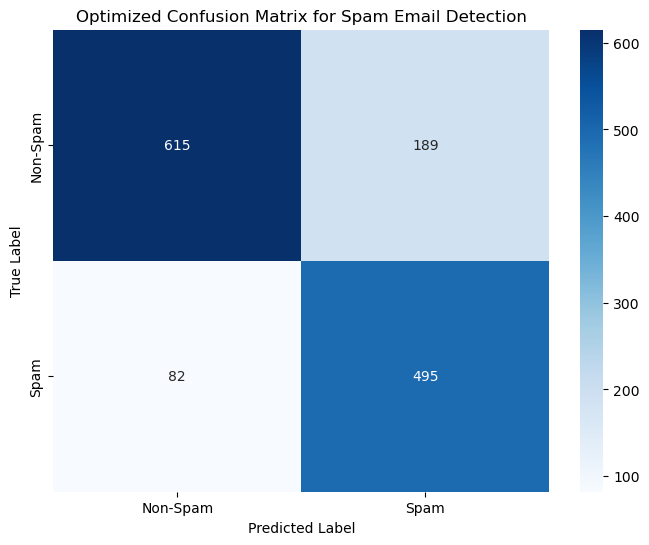


Optimized Classification Report for Spam Email Detection
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       804
           1       0.72      0.86      0.79       577

    accuracy                           0.80      1381
   macro avg       0.80      0.81      0.80      1381
weighted avg       0.82      0.80      0.81      1381



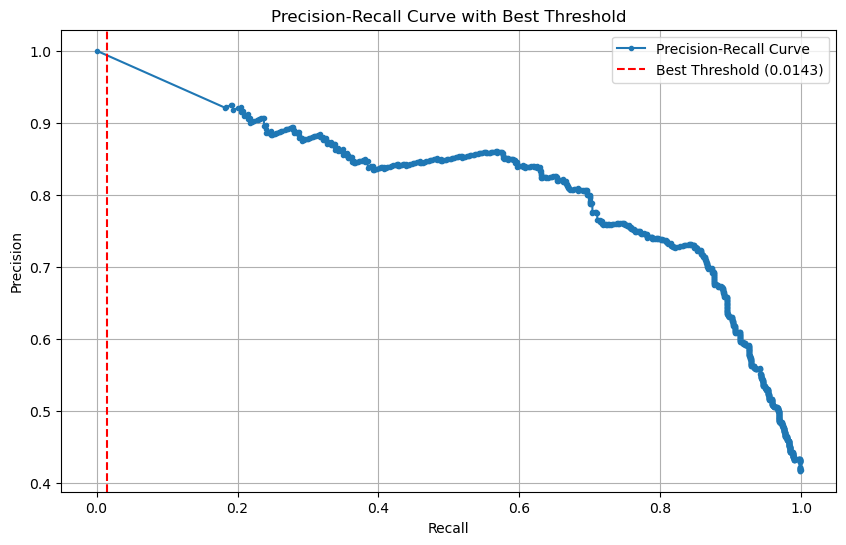

In [14]:
#Further tuning the model :Threshold turning
#maximize recall(true positive rate) and precision

# Test set predictions
y_prob = best_model.predict_proba(X_test)[:, 1]

# Precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Find the threshold that maximizes the F1 score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"\nBest Threshold for Maximum F1 Score: {best_threshold:.4f}")

# Predictions using the optimized threshold
y_pred_optimized = (y_prob >= best_threshold).astype(int)

# Evaluate the optimized predictions using the modular function
metrics_optimized = evaluate_model(
    y_test, y_pred_optimized, y_prob,
    title="Optimized Spam Detector Evaluation Metrics"
)

# Visualize the optimized confusion matrix
plot_confusion_matrix(
    y_test, y_pred_optimized, labels=['Non-Spam', 'Spam'],
    title="Optimized Confusion Matrix for Spam Email Detection"
)

# Classification report for optimized predictions
print_classification_report(
    y_test, y_pred_optimized, title="Optimized Classification Report for Spam Email Detection"
)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold ({best_threshold:.4f})')
plt.title('Precision-Recall Curve with Best Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()



Spam Detector Evaluation Metrics
Accuracy: 0.8458
Precision: 0.7427
Recall: 0.9653
F1 Score: 0.8395
AUC Score: 0.9607


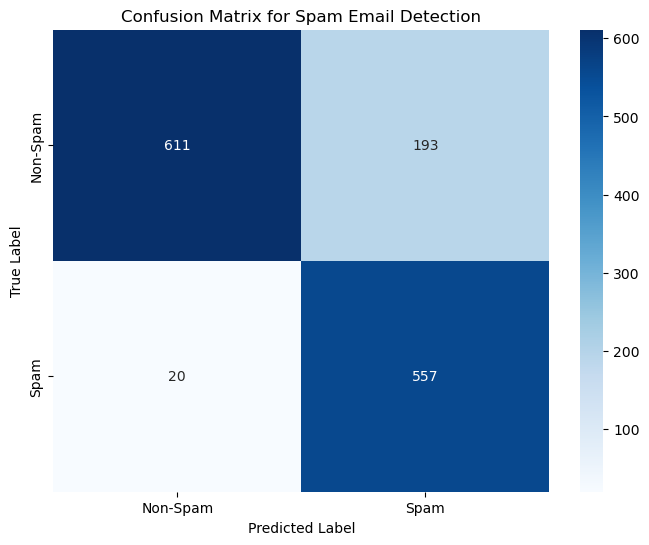


Classification Report for Spam Email Detection
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       804
           1       0.74      0.97      0.84       577

    accuracy                           0.85      1381
   macro avg       0.86      0.86      0.85      1381
weighted avg       0.87      0.85      0.85      1381



In [15]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import numpy as np

# Normalize the data to [0, 1] before SMOTE
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Clip negative values (if any) to ensure compatibility
X_train_resampled = np.clip(X_train_resampled, a_min=0, a_max=None)
X_test_scaled = np.clip(X_test_scaled, a_min=0, a_max=None)

# Train the Multinomial Naive Bayes model
spam_detector = MultinomialNB()
spam_detector.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = spam_detector.predict(X_test_scaled)
y_prob = spam_detector.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
metrics = evaluate_model(
    y_test, y_pred, y_prob,
    title="Spam Detector Evaluation Metrics"
)

# Visualize the confusion matrix
plot_confusion_matrix(
    y_test, y_pred, labels=['Non-Spam', 'Spam'],
    title="Confusion Matrix for Spam Email Detection"
)

# Print the classification report
print_classification_report(
    y_test, y_pred,
    title="Classification Report for Spam Email Detection"
)


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(



Decision Tree Evaluation Metrics:
Accuracy: 0.8067
Precision: 0.7320
Recall: 0.8475
F1 Score: 0.7855
AUC Score: 0.8011

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82       804
           1       0.73      0.85      0.79       577

    accuracy                           0.81      1381
   macro avg       0.80      0.81      0.80      1381
weighted avg       0.82      0.81      0.81      1381



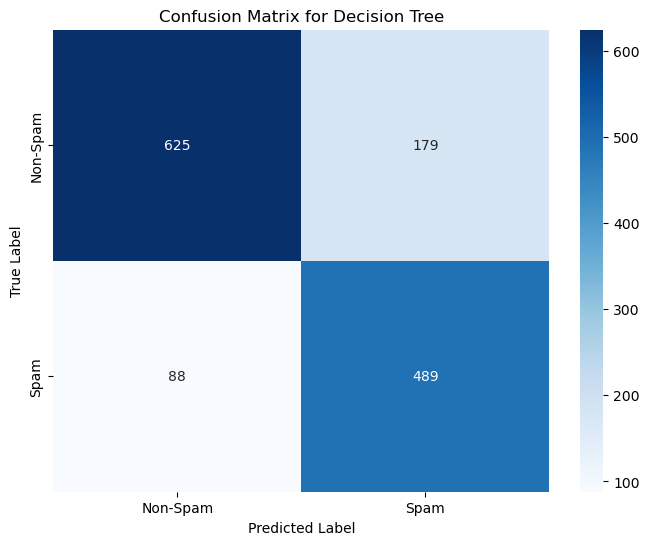

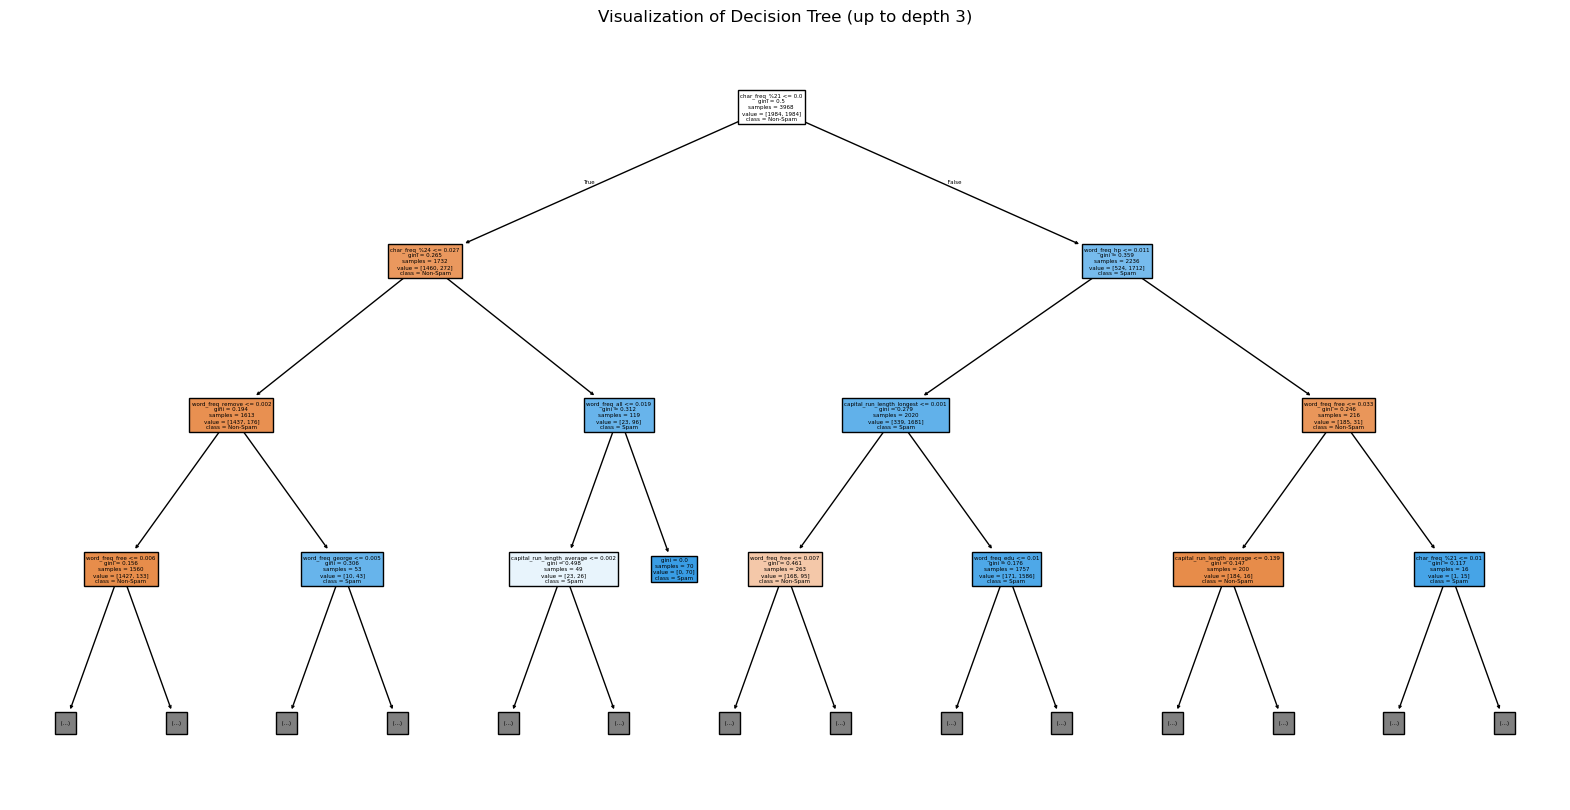

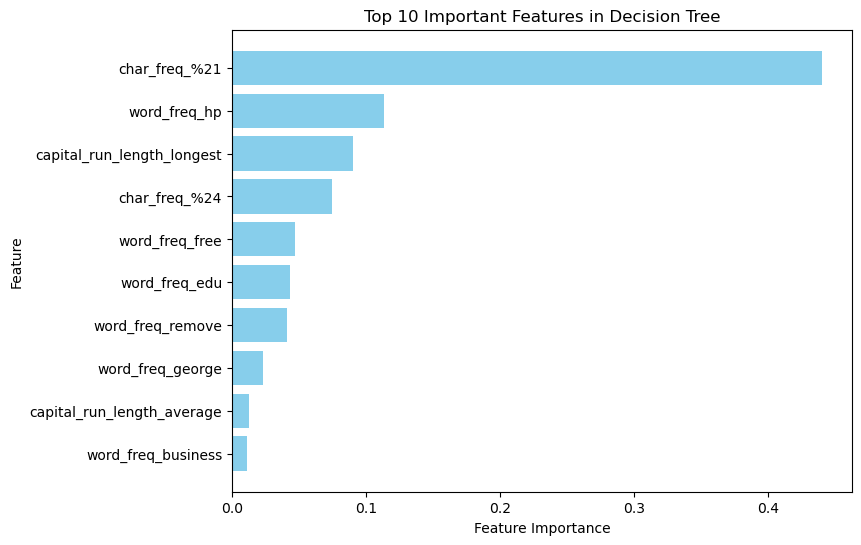

Training set class distribution:
class
0    1984
1    1236
Name: count, dtype: int64

Test set class distribution:
class
0    804
1    577
Name: count, dtype: int64
Predicted class distribution:
0    713
1    668
Name: count, dtype: int64


In [18]:

#  Decision Tree model
dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',  # Handle class imbalance
    max_depth=10,  # Prune the tree to prevent overfitting
    min_samples_split=10,  # Minimum number of samples to split a node
    min_samples_leaf=5  # Minimum number of samples at a leaf node
)

#  Training the model
dt_model.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Get the probability estimates for positive class

#  Evaluation 
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_score_dt = roc_auc_score(y_test, y_prob_dt)

# Print evaluation metrics
print("\nDecision Tree Evaluation Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"AUC Score: {auc_score_dt:.4f}")

# Classification report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Non-Spam', 'Spam'], filled=True, max_depth=3)
plt.title('Visualization of Decision Tree (up to depth 3)')
plt.show()

#  Tune and analyze feature importance
importances = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#  Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10), color='skyblue')
plt.title('Top 10 Important Features in Decision Tree')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())
print("Predicted class distribution:")
print(pd.Series(y_pred_dt).value_counts())





Gaussian Naive Bayes Evaluation Metrics
Accuracy: 0.8248
Precision: 0.7207
Recall: 0.9480
F1 Score: 0.8189
AUC Score: 0.9482


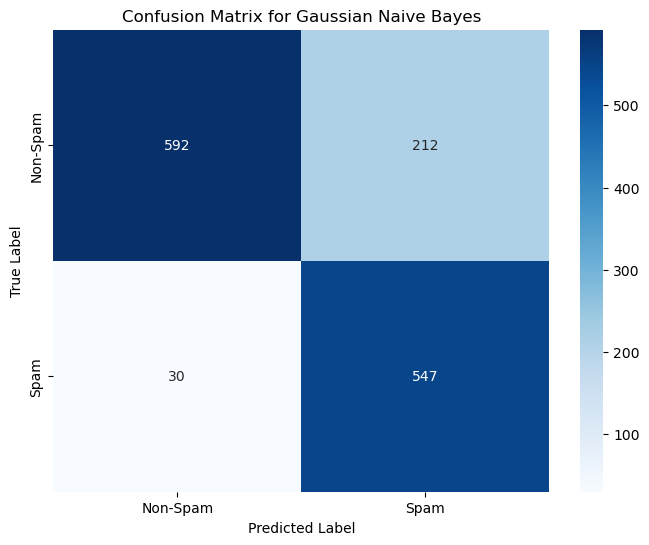


Classification Report for Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       804
           1       0.72      0.95      0.82       577

    accuracy                           0.82      1381
   macro avg       0.84      0.84      0.82      1381
weighted avg       0.86      0.82      0.83      1381



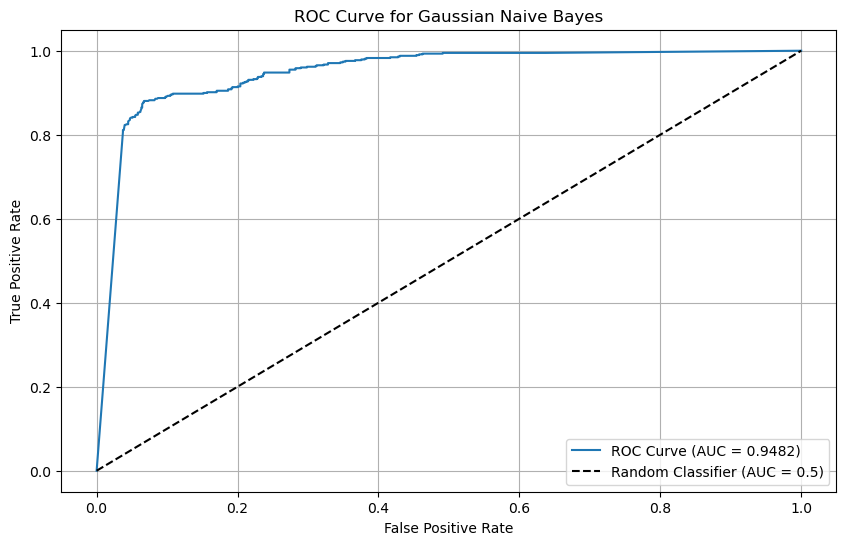

In [42]:
#Gaussian (better spam prediction, few FN) default model no tuning no skwed features
#trade off high recall
# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb_model.predict(X_test)
y_prob_gnb = gnb_model.predict_proba(X_test)[:, 1]  # Probability for the positive class (spam)

# Evaluate the model using the modular functions
metrics_gnb = evaluate_model(
    y_test, y_pred_gnb, y_prob_gnb,
    title="Gaussian Naive Bayes Evaluation Metrics"
)

# Visualize the confusion matrix
plot_confusion_matrix(
    y_test, y_pred_gnb, labels=['Non-Spam', 'Spam'],
    title="Confusion Matrix for Gaussian Naive Bayes"
)

# Print the classification report
print_classification_report(
    y_test, y_pred_gnb,
    title="Classification Report for Gaussian Naive Bayes"
)

# Plot the ROC curve
plot_roc_curve(
    y_test, y_prob_gnb, metrics_gnb['auc_score'],
    title="ROC Curve for Gaussian Naive Bayes"
)


#Gaussian : recall critical trade off lot of false positive
#multinomial : higher precision :  missing some spam emails in exchange for fewer false positives. min false positive

#best choice Gaussian 



Tuned Gaussian Naive Bayes Evaluation Metrics
Accuracy: 0.8552
Precision: 0.7622
Recall: 0.9497
F1 Score: 0.8457
AUC Score: 0.9313


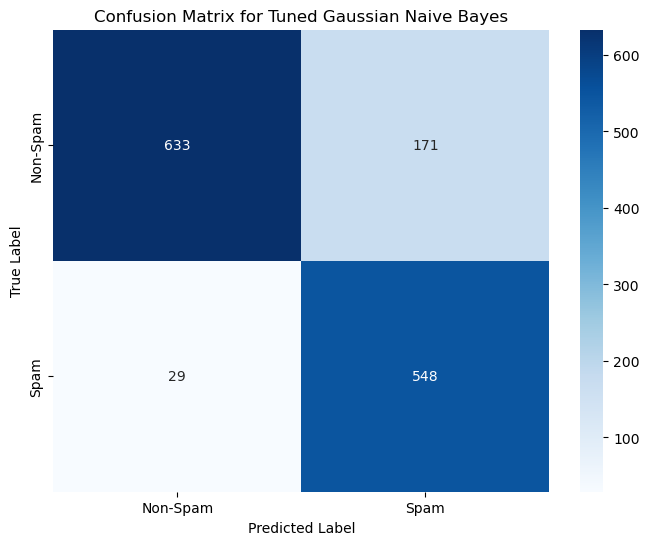


Classification Report for Tuned Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.96      0.79      0.86       804
           1       0.76      0.95      0.85       577

    accuracy                           0.86      1381
   macro avg       0.86      0.87      0.85      1381
weighted avg       0.88      0.86      0.86      1381



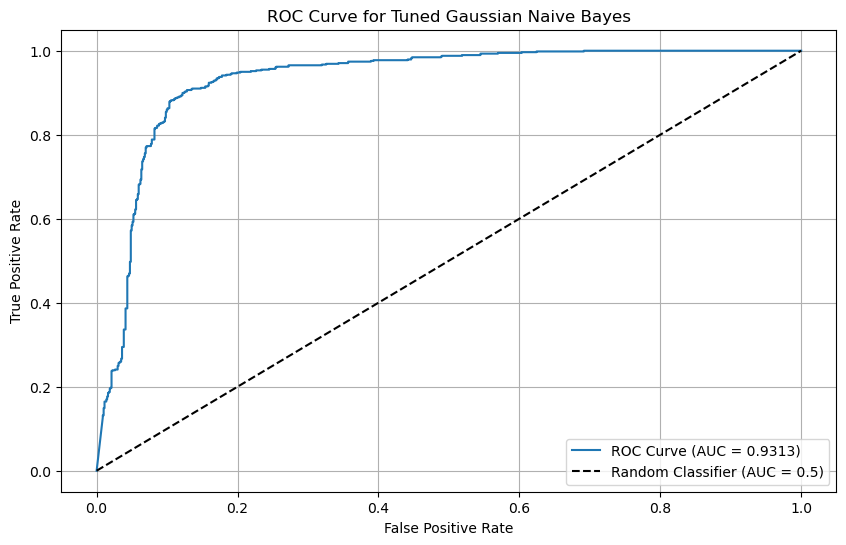


Best Parameters found by GridSearchCV for Gaussian Naive Bayes:
{'var_smoothing': 1e-06}


In [43]:
#Tuning Gaussian Naive Bayes :  var_smoothing. parameter
# Initialize the Gaussian Naive Bayes model
# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Set up the parameter grid for tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]  # Range of values for tuning
}

# Use GridSearchCV to find the best parameter
grid_search = GridSearchCV(gnb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Train the best model found by GridSearchCV
best_gnb_model = grid_search.best_estimator_

# Make predictions with the tuned model
y_pred_gnb = best_gnb_model.predict(X_test)
y_prob_gnb = best_gnb_model.predict_proba(X_test)[:, 1]

# Evaluate the model using the modular functions
metrics_gnb_tuned = evaluate_model(
    y_test, y_pred_gnb, y_prob_gnb,
    title="Tuned Gaussian Naive Bayes Evaluation Metrics"
)

# Visualize the confusion matrix
plot_confusion_matrix(
    y_test, y_pred_gnb, labels=['Non-Spam', 'Spam'],
    title="Confusion Matrix for Tuned Gaussian Naive Bayes"
)

# Print the classification report
print_classification_report(
    y_test, y_pred_gnb,
    title="Classification Report for Tuned Gaussian Naive Bayes"
)

# Plot the ROC curve
plot_roc_curve(
    y_test, y_prob_gnb, metrics_gnb_tuned['auc_score'],
    title="ROC Curve for Tuned Gaussian Naive Bayes"
)

# Display the best parameter found by GridSearchCV
print("\nBest Parameters found by GridSearchCV for Gaussian Naive Bayes:")
print(grid_search.best_params_)

#  var_smoothing. parameter adds a small amount of variance to the features to prevent numerical instability, which can help improve model performance.


Skewed Features:
 Index(['capital_run_length_longest', 'word_freq_parts', 'word_freq_3d',
       'capital_run_length_average', 'char_freq_%23', 'word_freq_table',
       'char_freq_%21', 'word_freq_conference', 'word_freq_credit',
       'word_freq_project', 'char_freq_%5B', 'word_freq_85', 'word_freq_money',
       'char_freq_%3B', 'char_freq_%28', 'word_freq_report', 'word_freq_cs',
       'word_freq_pm', 'word_freq_857', 'word_freq_lab', 'word_freq_415',
       'word_freq_internet', 'word_freq_address', 'word_freq_font',
       'word_freq_free', 'word_freq_direct', 'word_freq_mail',
       'word_freq_meeting', 'char_freq_%24', 'word_freq_telnet',
       'word_freq_re', 'word_freq_data', 'word_freq_technology',
       'word_freq_edu', 'word_freq_original', 'word_freq_addresses',
       'word_freq_labs', 'capital_run_length_total', 'word_freq_650',
       'word_freq_over', 'word_freq_remove', 'word_freq_business',
       'word_freq_people', 'word_freq_email', 'word_freq_hpl',
       

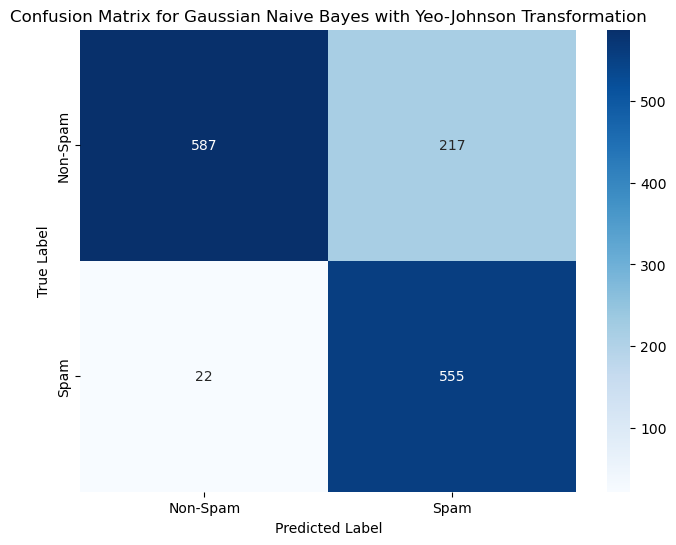


Classification Report for Gaussian Naive Bayes with Yeo-Johnson Transformation
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       804
           1       0.72      0.96      0.82       577

    accuracy                           0.83      1381
   macro avg       0.84      0.85      0.83      1381
weighted avg       0.86      0.83      0.83      1381



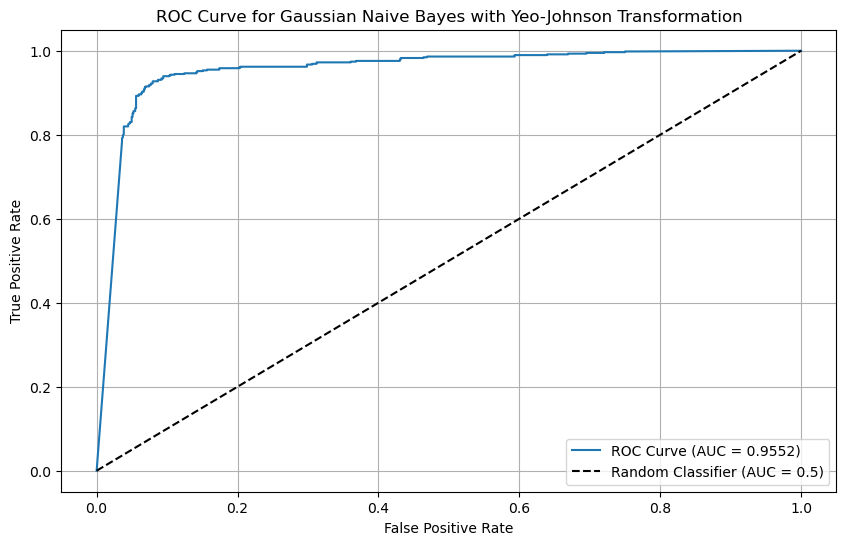

In [44]:
#Feature transformation 
# Calculate skewness for each feature
# Identify skewed features
skewness = X_train.skew().sort_values(ascending=False)
skewed_features = skewness[skewness > 0.75].index  # Adjust threshold as needed
print("\nSkewed Features:\n", skewed_features)

# Apply Yeo-Johnson transformation
transformer = PowerTransformer(method='yeo-johnson')
X_train[skewed_features] = transformer.fit_transform(X_train[skewed_features])
X_test[skewed_features] = transformer.transform(X_test[skewed_features])

# Train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_gnb = gnb_model.predict(X_test)
y_prob_gnb = gnb_model.predict_proba(X_test)[:, 1]

# Evaluate the model using modular functions
metrics_gnb_transformed = evaluate_model(
    y_test, y_pred_gnb, y_prob_gnb,
    title="Gaussian Naive Bayes Evaluation with Yeo-Johnson Transformation"
)

# Visualize the confusion matrix
plot_confusion_matrix(
    y_test, y_pred_gnb, labels=['Non-Spam', 'Spam'],
    title="Confusion Matrix for Gaussian Naive Bayes with Yeo-Johnson Transformation"
)

# Print the classification report
print_classification_report(
    y_test, y_pred_gnb,
    title="Classification Report for Gaussian Naive Bayes with Yeo-Johnson Transformation"
)

# Plot the ROC curve
plot_roc_curve(
    y_test, y_prob_gnb, metrics_gnb_transformed['auc_score'],
    title="ROC Curve for Gaussian Naive Bayes with Yeo-Johnson Transformation"
)



Columns with Skewness Transformed:
 Index(['capital_run_length_longest', 'word_freq_parts', 'word_freq_3d',
       'capital_run_length_average', 'char_freq_%23', 'word_freq_table',
       'char_freq_%21', 'word_freq_conference', 'word_freq_credit',
       'word_freq_project', 'char_freq_%5B', 'word_freq_85', 'word_freq_money',
       'char_freq_%3B', 'char_freq_%28', 'word_freq_report', 'word_freq_cs',
       'word_freq_pm', 'word_freq_857', 'word_freq_lab', 'word_freq_415',
       'word_freq_internet', 'word_freq_address', 'word_freq_font',
       'word_freq_free', 'word_freq_direct', 'word_freq_mail',
       'word_freq_meeting', 'char_freq_%24', 'word_freq_telnet',
       'word_freq_re', 'word_freq_data', 'word_freq_technology',
       'word_freq_edu', 'word_freq_original', 'word_freq_addresses',
       'word_freq_labs', 'capital_run_length_total', 'word_freq_650',
       'word_freq_over', 'word_freq_remove', 'word_freq_business',
       'word_freq_people', 'word_freq_email', 'word_

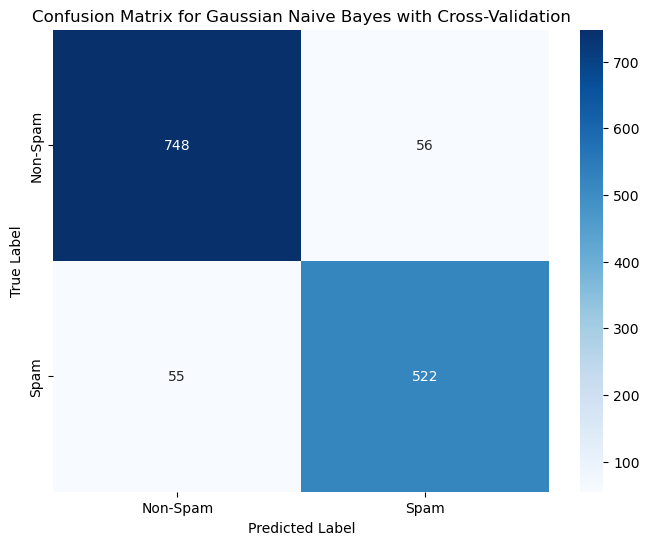


Classification Report for Gaussian Naive Bayes with Cross-Validation
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       804
           1       0.90      0.90      0.90       577

    accuracy                           0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381



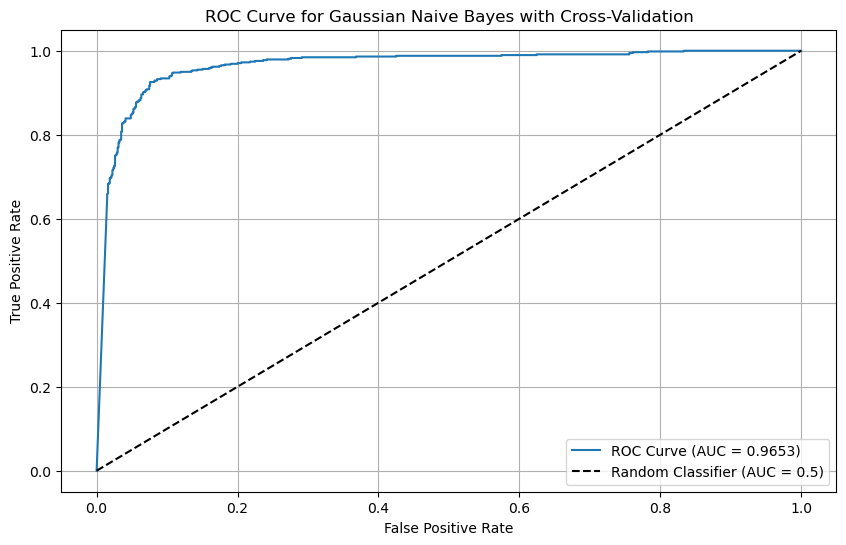


Best Parameters found by GridSearchCV:
{'var_smoothing': 1e-09}


In [45]:
#Retaining all the features and not removing
# Further tuning 
# Skewed feature selection and cross validation 
# Split data into training and testing sets
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify skewed features and apply Yeo-Johnson transformation
def skewed_feature_transformation(train_data, test_data, skew_threshold=1.0):
    skewed_feats = train_data.skew().sort_values(ascending=False)
    skewed_columns = skewed_feats[abs(skewed_feats) > skew_threshold].index
    
    power_transformer = PowerTransformer(method='yeo-johnson')
    train_data[skewed_columns] = power_transformer.fit_transform(train_data[skewed_columns])
    test_data[skewed_columns] = power_transformer.transform(test_data[skewed_columns])
    
    return train_data, test_data, skewed_columns

X_train, X_test, skewed_columns = skewed_feature_transformation(X_train, X_test)
print("\nColumns with Skewness Transformed:\n", skewed_columns)

# Feature selection using SelectKBest
def feature_selection(X, y, num_features=20):  # Select top 20 features
    skb = SelectKBest(score_func=f_classif, k=num_features)
    X_new = skb.fit_transform(X, y)
    
    # Get feature names and their corresponding scores
    feature_indices = skb.get_support(indices=True)
    selected_features = X.columns[feature_indices]
    
    print("\nTop Selected Features and their ANOVA F-scores:")
    feature_scores = list(zip(selected_features, skb.scores_[feature_indices]))
    for feature, score in sorted(feature_scores, key=lambda x: x[1], reverse=True):
        print(f"{feature}: {score:.4f}")
    
    return X[selected_features]

selected_X_train = feature_selection(X_train, y_train)
selected_X_test = X_test[selected_X_train.columns]

# Apply robust scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(selected_X_train)
X_test_scaled = scaler.transform(selected_X_test)

# Hyperparameter tuning with cross-validation for Gaussian Naive Bayes
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
gnb_model = GaussianNB()
grid_search = GridSearchCV(gnb_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best model after tuning
best_gnb_model = grid_search.best_estimator_

# Cross-validation scores
cv_scores = cross_val_score(best_gnb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Make predictions and evaluate the model
y_pred_gnb = best_gnb_model.predict(X_test_scaled)
y_prob_gnb = best_gnb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using modular functions
metrics_gnb_tuned = evaluate_model(
    y_test, y_pred_gnb, y_prob_gnb,
    title="Gaussian Naive Bayes Evaluation with Cross-Validation and Feature Transformation"
)

# Visualize the confusion matrix
plot_confusion_matrix(
    y_test, y_pred_gnb, labels=['Non-Spam', 'Spam'],
    title="Confusion Matrix for Gaussian Naive Bayes with Cross-Validation"
)

# Print the classification report
print_classification_report(
    y_test, y_pred_gnb,
    title="Classification Report for Gaussian Naive Bayes with Cross-Validation"
)

# Plot the ROC curve
plot_roc_curve(
    y_test, y_prob_gnb, metrics_gnb_tuned['auc_score'],
    title="ROC Curve for Gaussian Naive Bayes with Cross-Validation"
)

# Display the best parameters found by GridSearchCV
print("\nBest Parameters found by GridSearchCV:")
print(grid_search.best_params_)

 
 



In [11]:
# Standardizing the features using RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.9297610427226647

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       804
           1       0.94      0.89      0.91       577

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.93      1381
weighted avg       0.93      0.93      0.93      1381



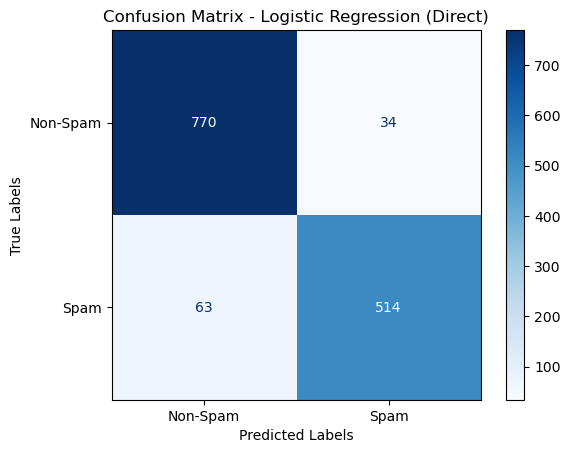

In [17]:
# Confusion Matrix for Logistic Regression (Direct)
cm_direct = confusion_matrix(y_test, y_pred)
disp_direct = ConfusionMatrixDisplay(confusion_matrix=cm_direct, display_labels=["Non-Spam", "Spam"])
disp_direct.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression (Direct)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [12]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Logistic Regression Model after SMOTE
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(scaler.transform(X_train_smote), y_train_smote)

# Predictions on the original test set
y_pred_smote = log_reg_smote.predict(X_test_scaled)

# Evaluation
print("\nLogistic Regression with SMOTE Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))



Logistic Regression with SMOTE Results:
Accuracy: 0.9312092686459088

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       804
           1       0.92      0.92      0.92       577

    accuracy                           0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381



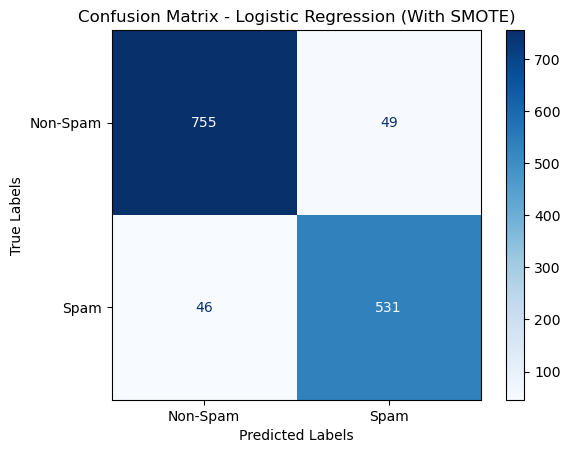

In [18]:
# Confusion Matrix for Logistic Regression with SMOTE
cm_smote = confusion_matrix(y_test, y_pred_smote)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=["Non-Spam", "Spam"])
disp_smote.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression (With SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()